# Blindness Detection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os
import pickle
import random

In [5]:
Directory = "BlindnessDataSet"
Classes = ["No_DR","Mild","Moderate","Proliferate_DR","Severe"]
Train_Data = []
for Cata in Classes:
    path = os.path.join(Directory , Cata)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path,image))
        image_array = cv2.resize(image_array , (224,224))
        CataVal = 0
        if(Classes.index(Cata)!=0):
            CataVal = 1
        Train_Data.append([image_array, CataVal])

In [6]:
random.shuffle(Train_Data)

X,Y=[],[]

for x,y in Train_Data:
    X.append(x)
    Y.append(y)

X = np.array(X).reshape(-1,224,224,3)
Y = np.array(Y)

X = X/255.0

# Saving File

In [8]:
p_o = open("X_B.pickle","wb")
pickle.dump(X , p_o)
p_o.close()

p_o = open("Y_B.pickle","wb")
pickle.dump(Y , p_o)
p_o.close()

In [9]:
p_i = open("X.pickle" , "rb")
X = pickle.load(p_i)

p_i = open("Y.pickle" , "rb")
Y = pickle.load(p_i)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.applications.mobilenet.MobileNet()

base_input = model.layers[0].input
base_output = model.layers[-4].output

flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input , outputs= final_output)

In [7]:
print(X.shape)

(3657, 224, 224, 3)


In [11]:
new_model.compile(loss="binary_crossentropy" , optimizer="adam" , metrics=["accuracy"])
new_model.fit(X,Y, epochs = 20, validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 166s 4s/step - loss: 0.1072 - accuracy: 0.9572 - val_loss: 0.4163 - val_accuracy: 0.9316
Epoch 2/20
33/33 [==============================] - 123s 4s/step - loss: 0.0276 - accuracy: 0.9924 - val_loss: 0.0728 - val_accuracy: 0.9924
Epoch 3/20
33/33 [==============================] - 124s 4s/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.1060 - val_accuracy: 0.9886
Epoch 4/20
33/33 [==============================] - 122s 4s/step - loss: 0.0173 - accuracy: 0.9971 - val_loss: 0.0798 - val_accuracy: 0.9848
Epoch 5/20
33/33 [==============================] - 122s 4s/step - loss: 0.0174 - accuracy: 0.9971 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/20
33/33 [==============================] - 120s 4s/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.1596 - val_accuracy: 0.9772
Epoch 7/20
33/33 [==============================] - 120s 4s/step - loss: 0.0158 - accuracy: 0.9962 - val_loss: 0.2300 - val_accuracy: 0.9544
Epoch 8/20
33

In [12]:
new_model.save("BlindNessModel.h5")

C:\Users\rishi\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
def Detect(image):
    font_size = 1
    font = cv2.FONT_HERSHEY_PLAIN
    image = cv2.resize(image,(224,224))
    image1 = np.expand_dims(image,axis=0)
    image1 = image1/255.0

    predictions = new_model.predict(image1)
    if(predictions[0]<0.5):
        cv2.putText(image ,"With BlindNess", (0,25) , font,fontScale=font_size,color=(0,0,255))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        cv2.putText(image ,"No Blindness", (0,25) , font,fontScale=font_size,color=(0,0,255))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 1s 1s/step


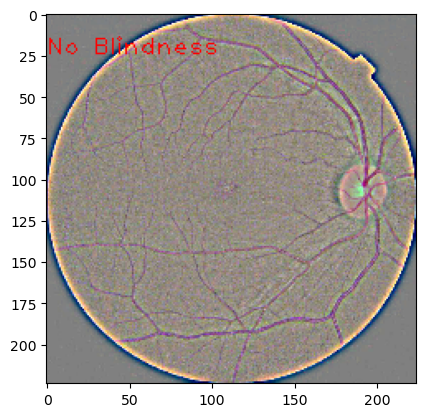

In [14]:
test_image = cv2.imread("BlindnessDataSet/Test/No.png")
Detect(test_image)

1/1 [==============================] - 0s 67ms/step


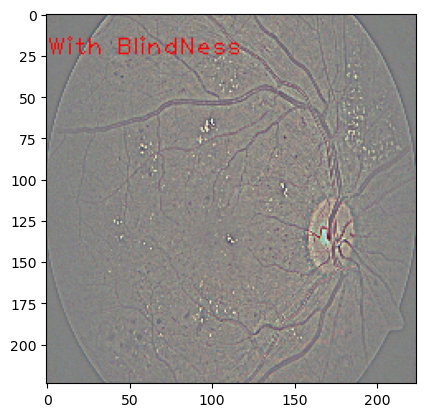

In [15]:
test_image = cv2.imread("BlindnessDataSet/Test/Severe.png")
Detect(test_image)